EDA  Healthcare Data

import all the necessary libraries.
pandas and numpy are used for data manipulation and analysis.
matplotlib.pyplot and seaborn are used for visualization.
%matplotlib inline ensures that plots are displayed within the notebook.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib to display inline
%matplotlib inline


Load your dataset and handle any potential file loading errors.

Replace 'path/to/healthcare_providers_data.csv' with the actual path to your CSV file.
This step reads the dataset into a pandas DataFrame and checks if the file exists.

In [2]:
# Load the dataset
try:
    df = pd.read_csv('Healthcare Providers.csv')
    print("Dataset loaded successfully")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
# Step 2: Subset the Data (first 30 rows)
df_subset = df.head(30)

Dataset loaded successfully


In the third cell, display basic information about the dataset.

Display basic information about the dataset to understand its structure.
df.info() provides information about the dataset, including column names, non-null counts, and data types.
df.head() displays the first few rows of the dataset to give a preview of the data.


In [3]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

print("\nFirst few rows of the dataset:")
df.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-nul

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758



Check and handle any missing values in the dataset.
df.isnull().sum() counts the number of missing values in each column.
df.dropna() removes rows with missing values. You might choose to fill missing values instead depending on the dataset.



In [4]:
# Handle missing values (e.g., dropping rows with missing values)
df = df.dropna()


Generate basic statistics for numerical columns.
df.describe() provides summary statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles.




In [5]:
# Basic statistics
print("\nBasic Statistics:")
df.describe()



Basic Statistics:


,index,National Provider Identifier,Zip Code of the Provider
count,2.934600e+04,2.934600e+04,2.934600e+04
mean,4.894577e+06,1.497140e+09,4.201327e+08
std,2.845657e+06,2.880431e+08,3.143447e+08
min,3.900000e+02,1.003002e+09,6.120000e+02
25%,2.431374e+06,1.245407e+09,1.521325e+08
50%,4.885643e+06,1.497782e+09,3.580146e+08
75%,7.321879e+06,1.740266e+09,7.111093e+08
max,9.847437e+06,1.993000e+09,9.990166e+08


Visualize the distribution of numerical features using histograms.
This step selects numerical columns and plots their distributions using histograms and KDE plots.


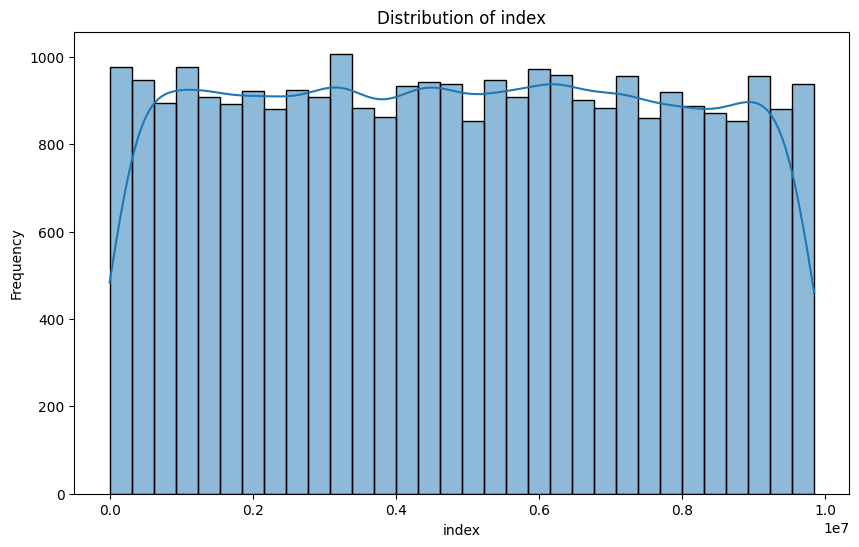

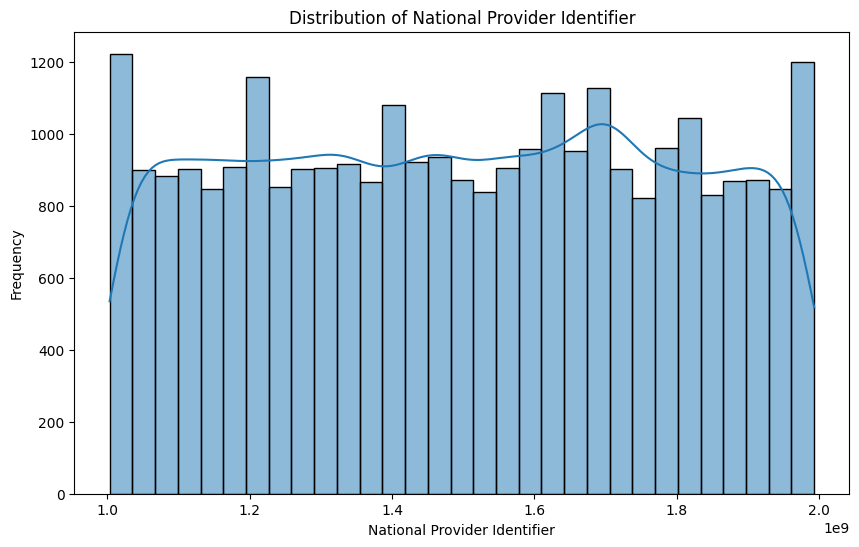

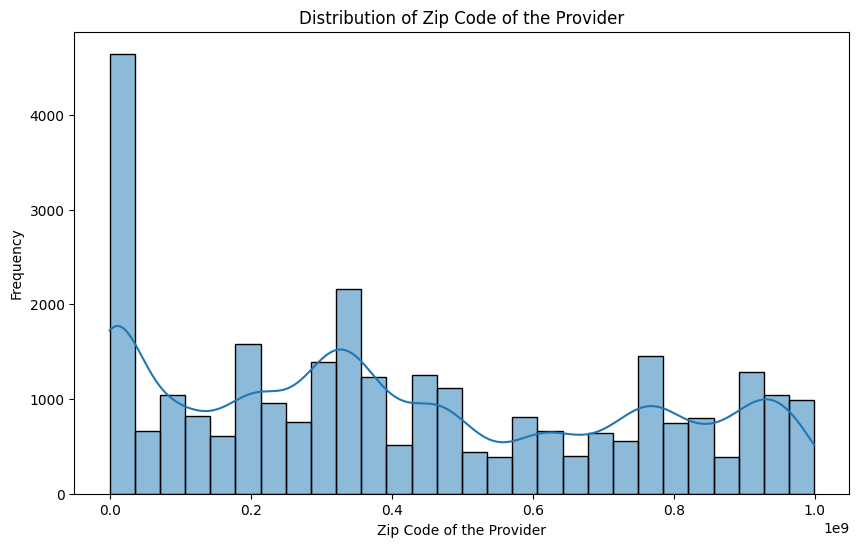

In [6]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

if numerical_features:
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature],kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
else:
    print("No numerical features found in the dataset.")


Check for outliers in numerical features using boxplots.
Boxplots help identify outliers in numerical data.


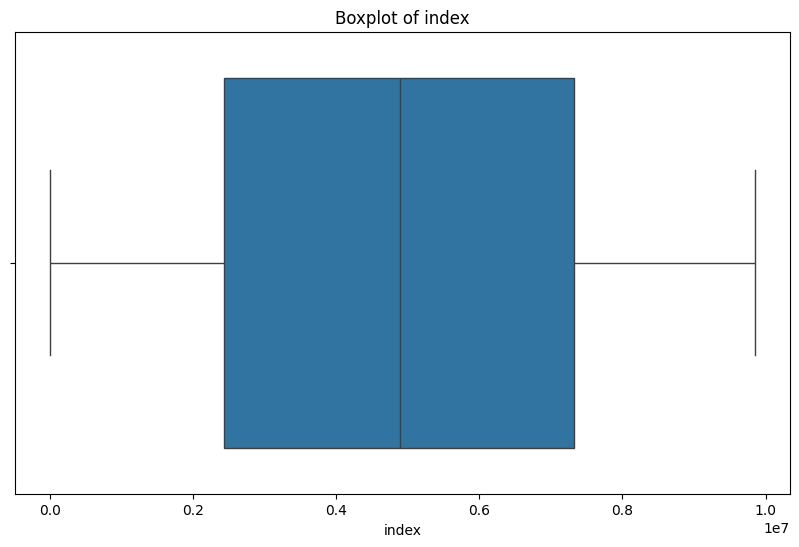

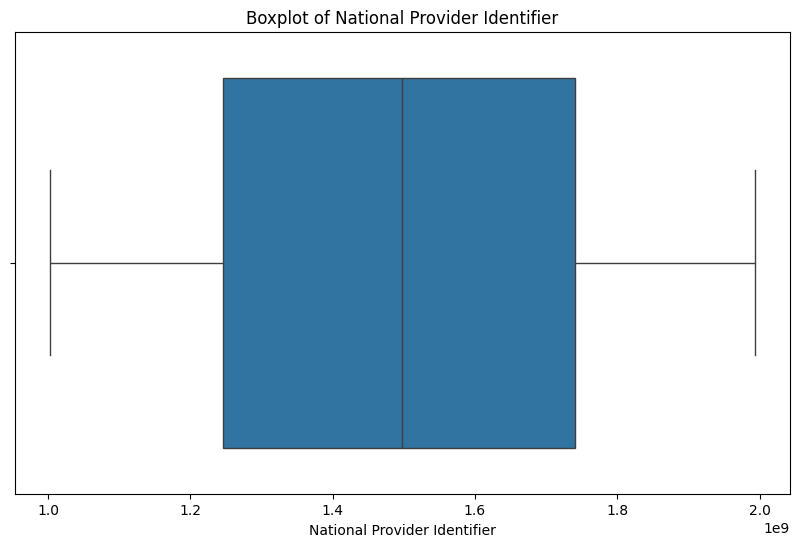

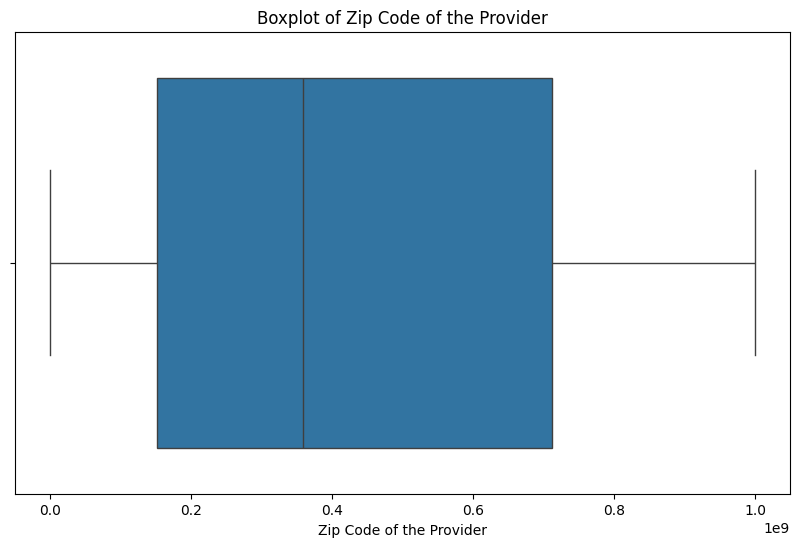

In [7]:
# Boxplots for numerical features to check for outliers
if numerical_features:
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        plt.show()
else:
    print("No numerical features found in the dataset.")


Visualize the distribution of categorical features using count plots.
This step selects categorical columns and plots their value counts.


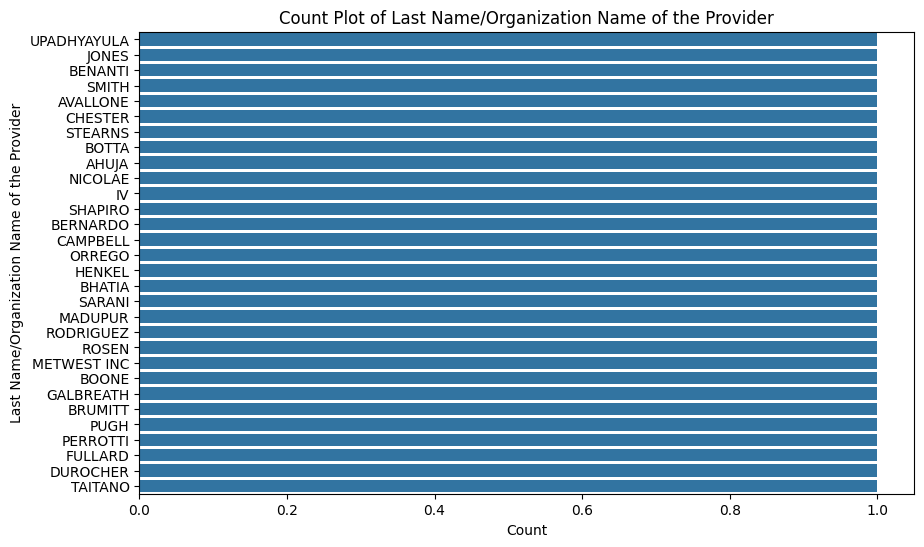

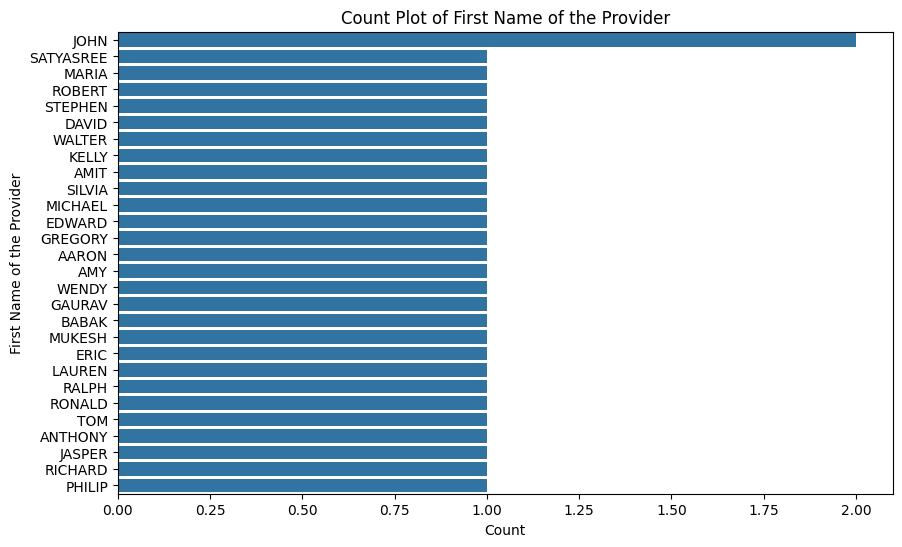

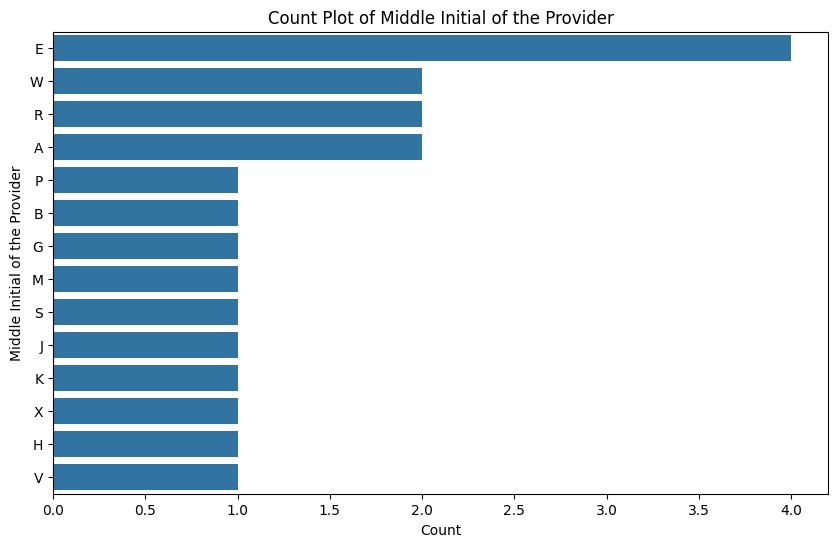

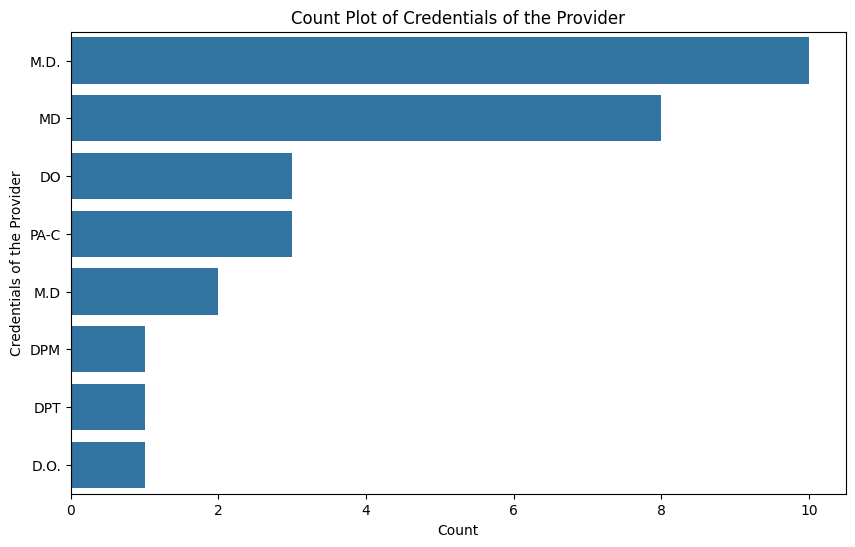

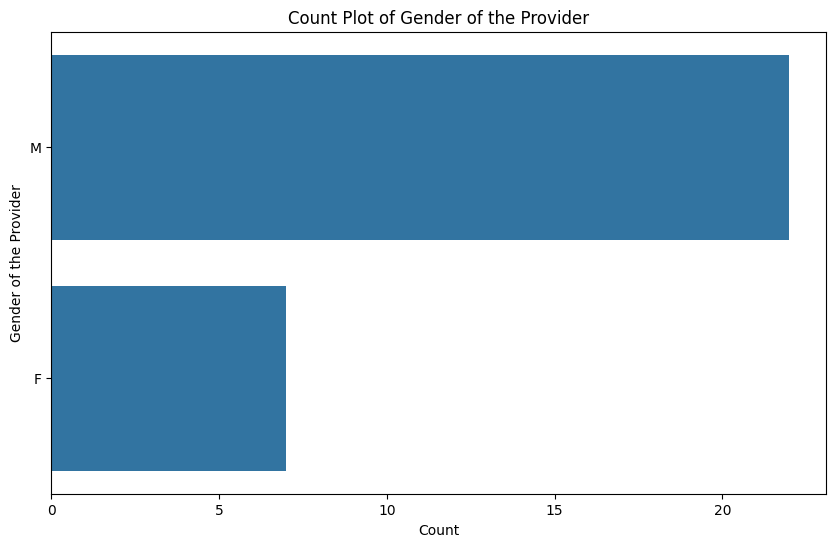

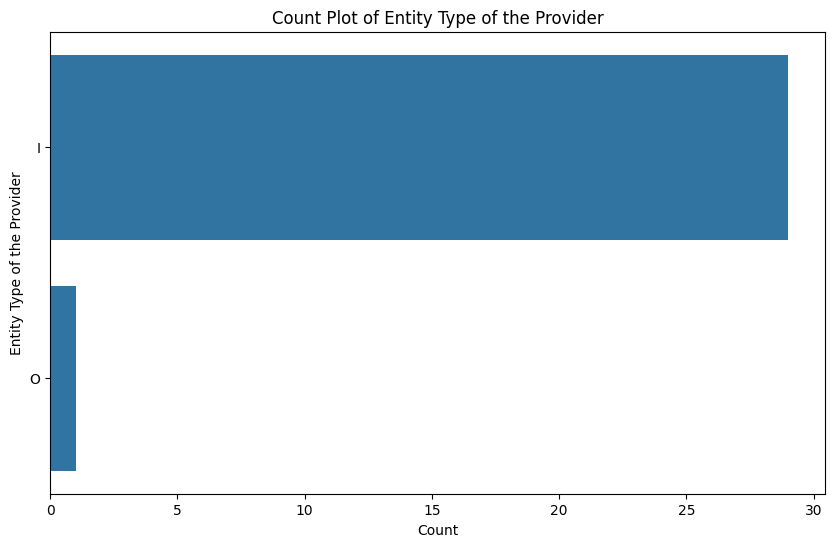

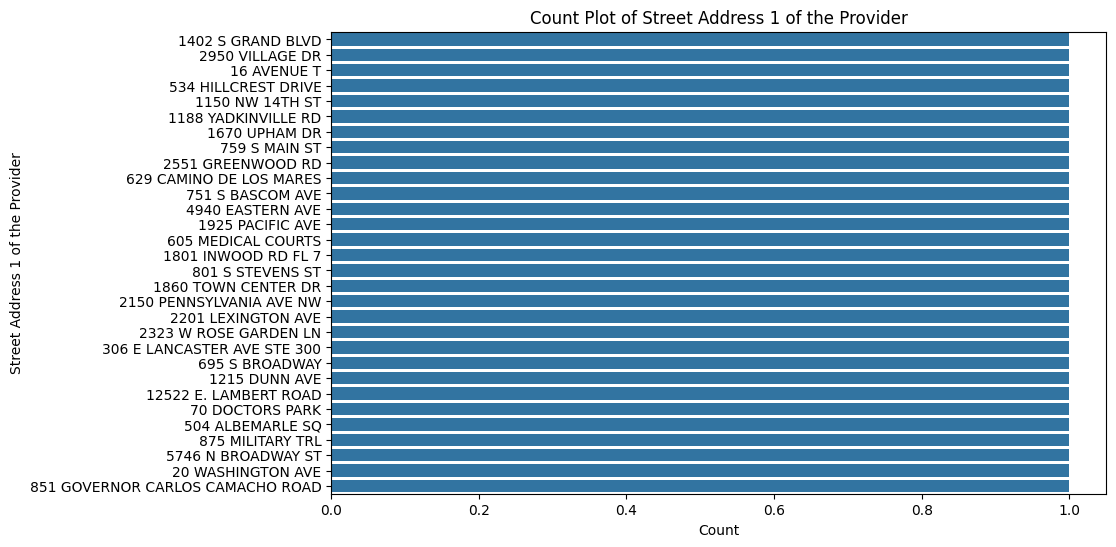

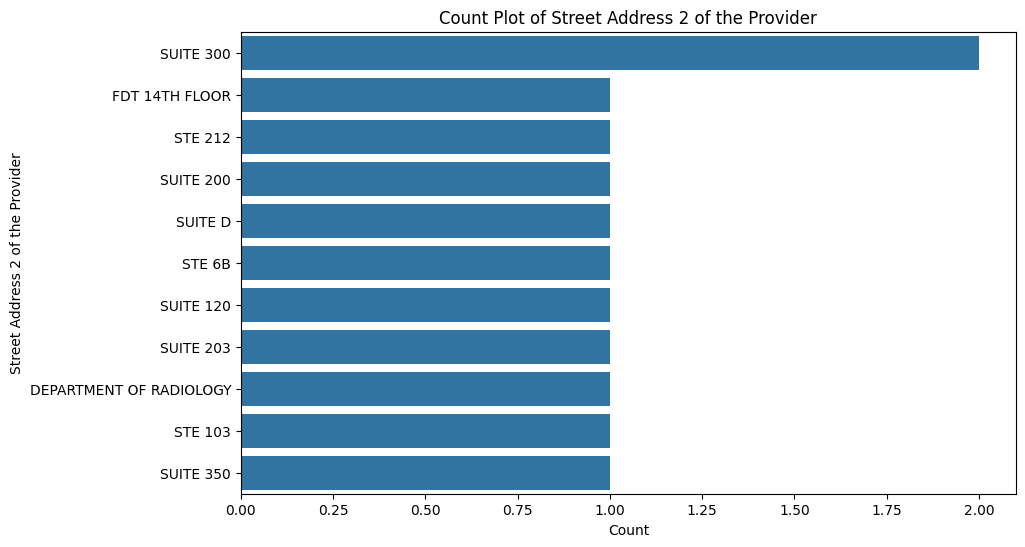

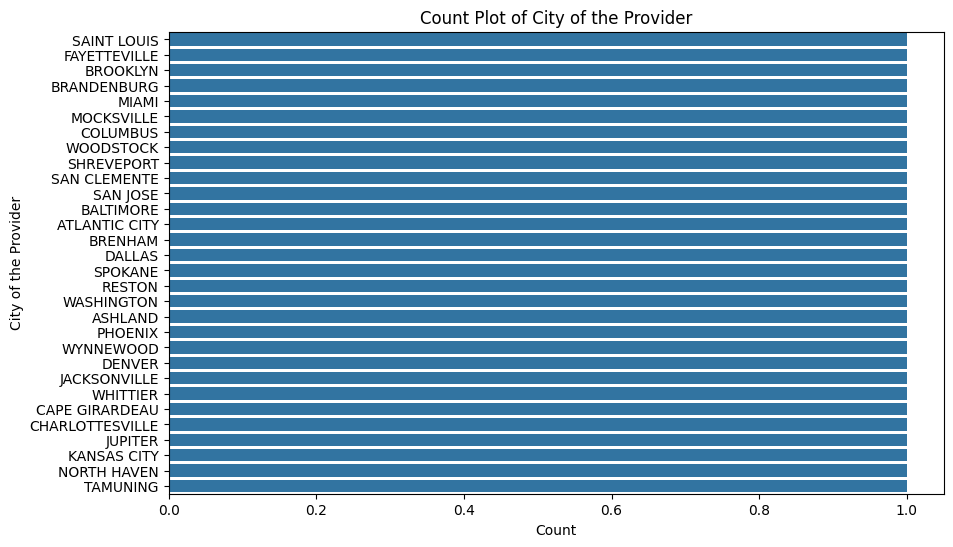

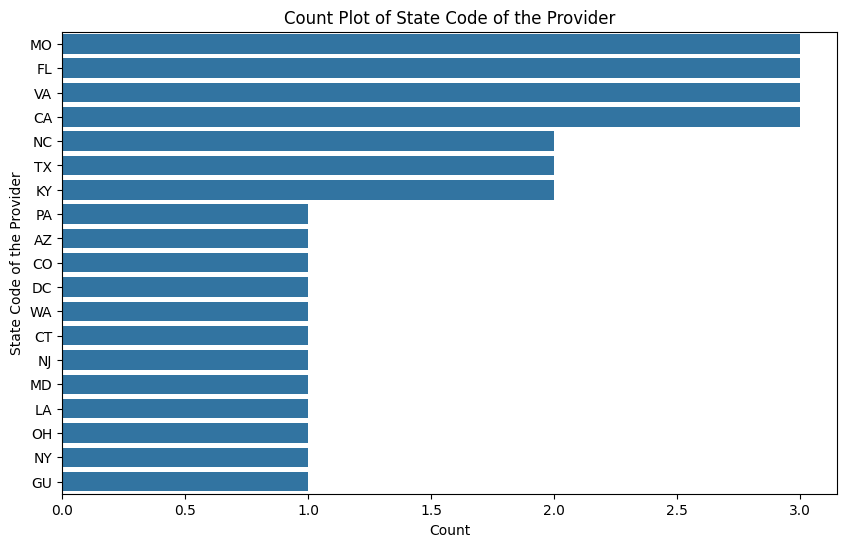

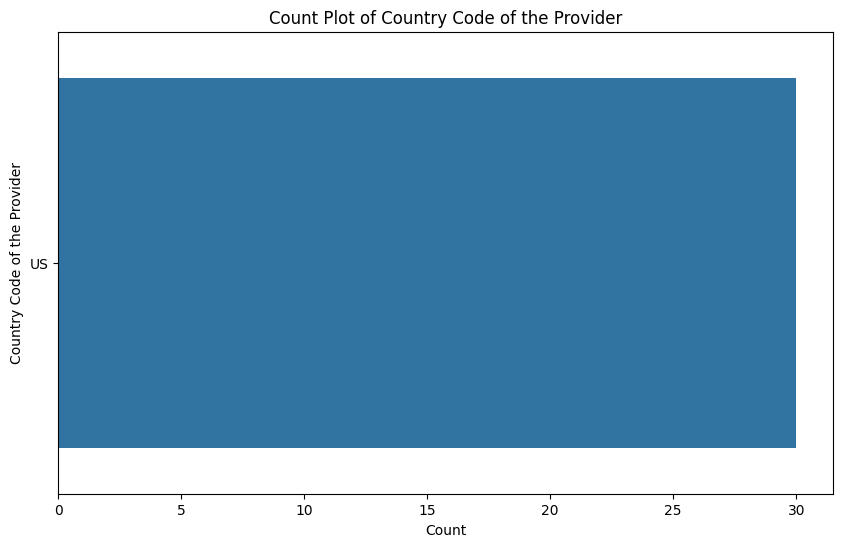

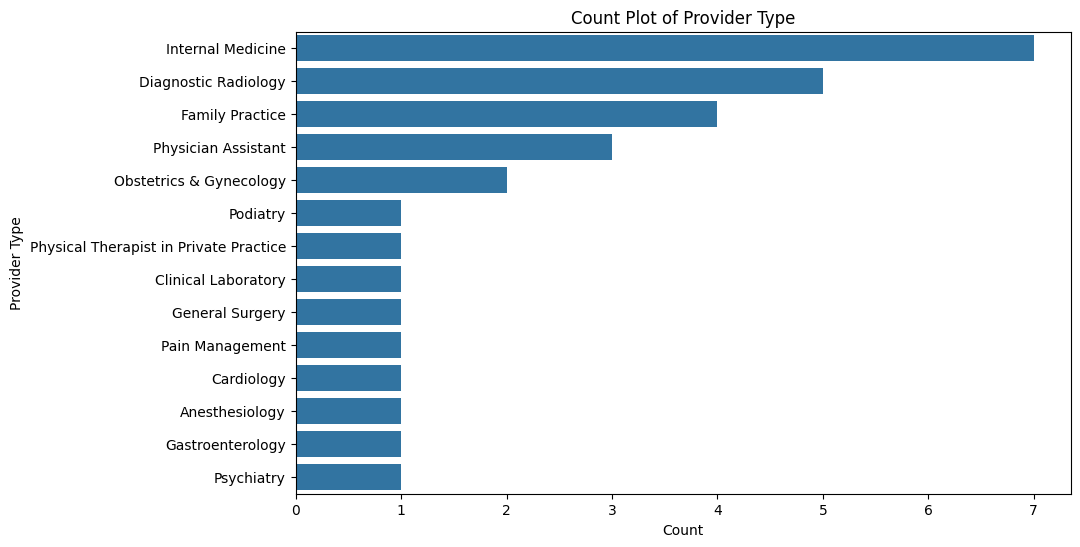

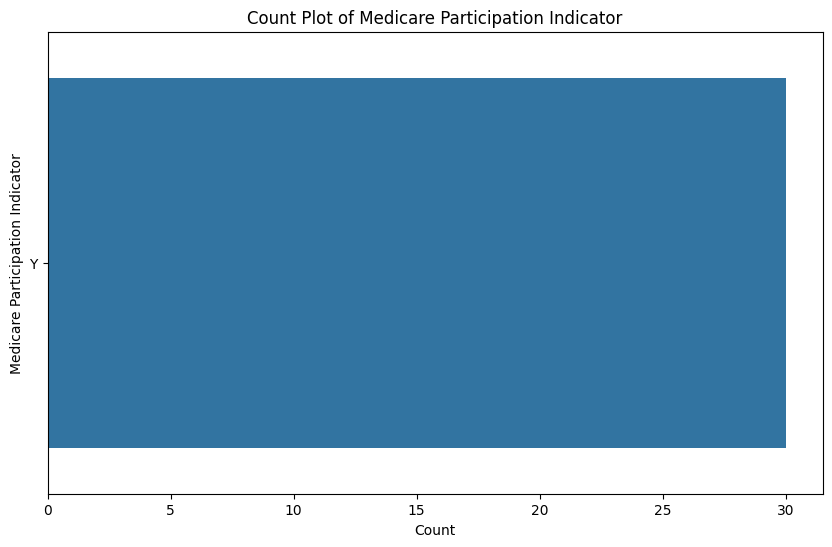

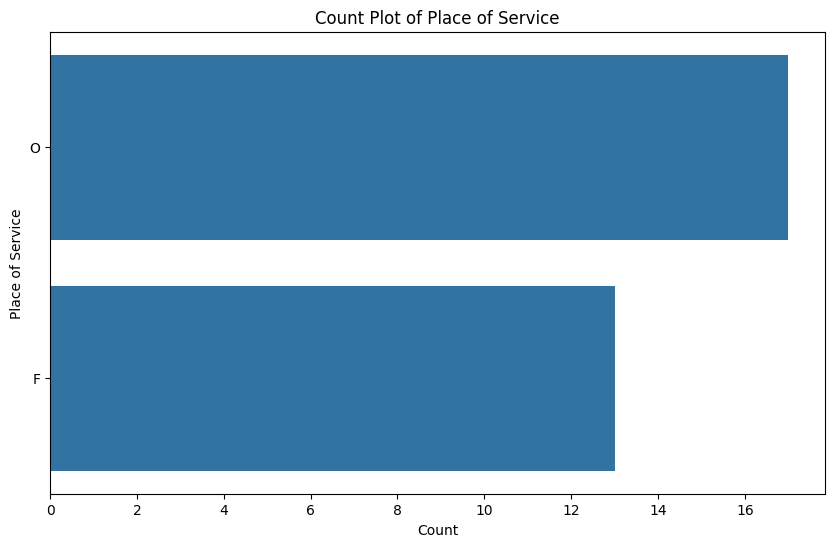

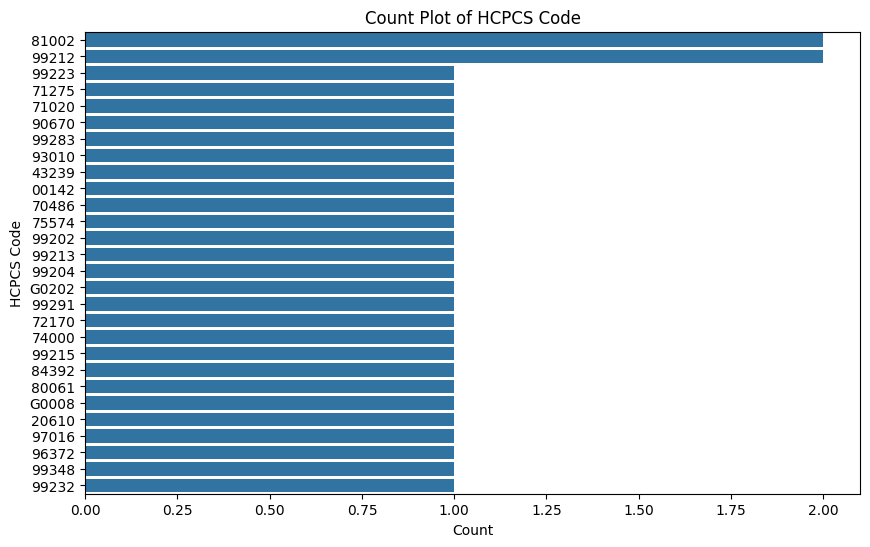

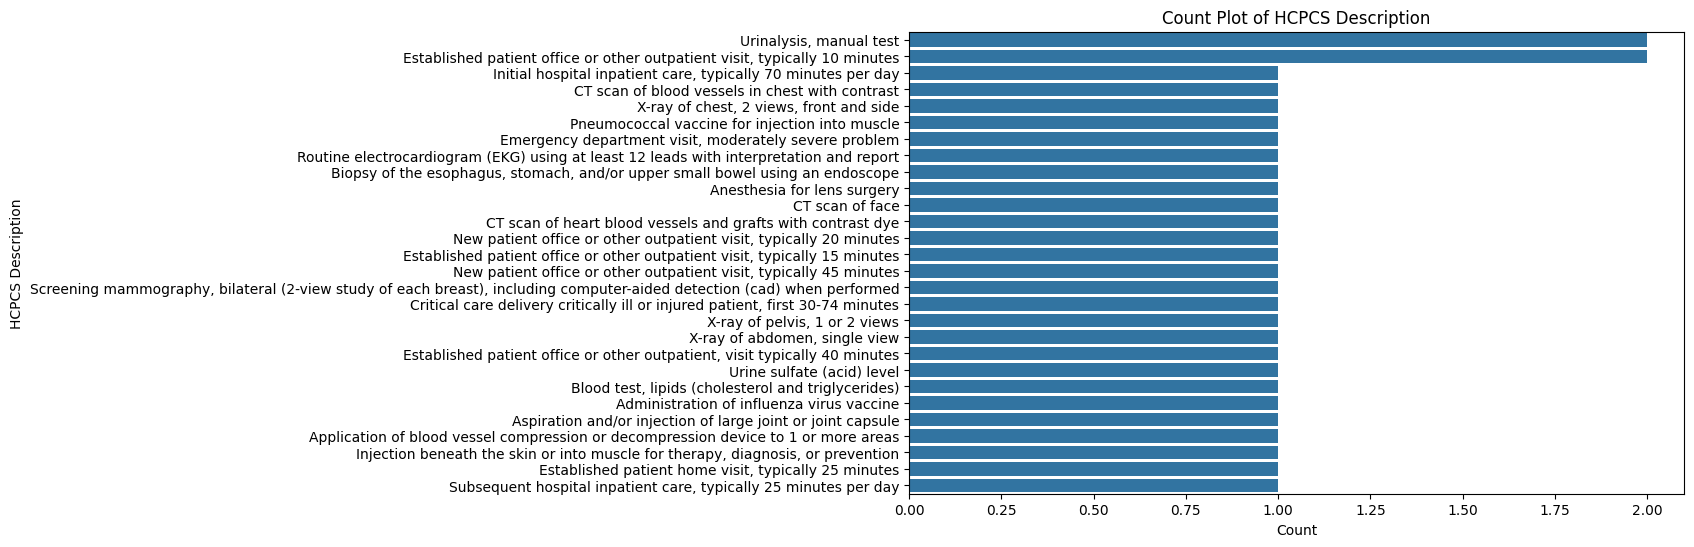

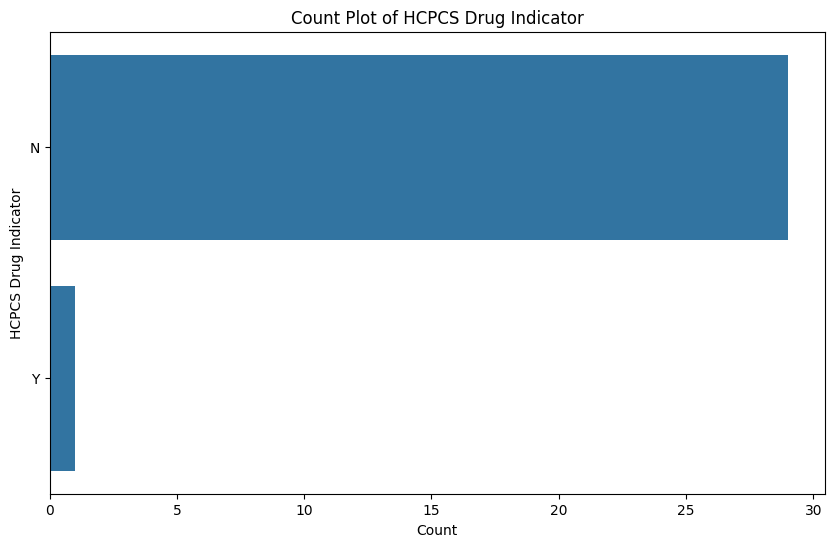

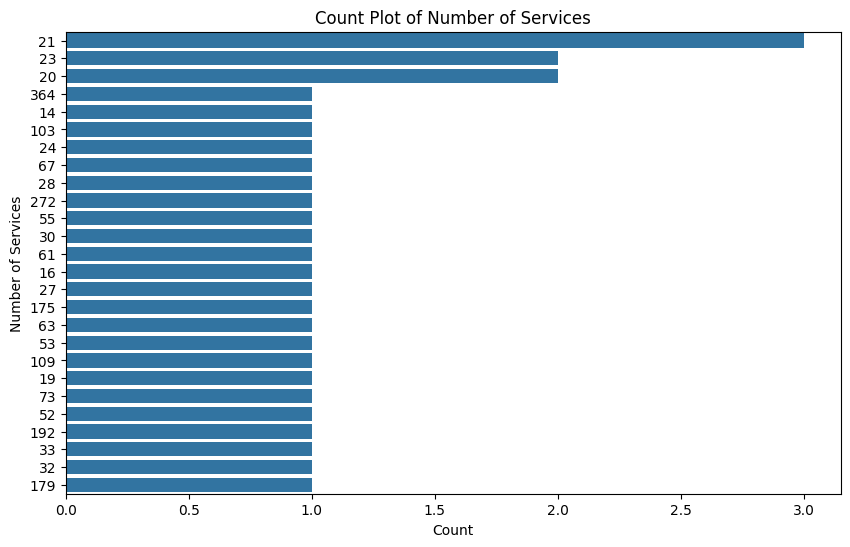

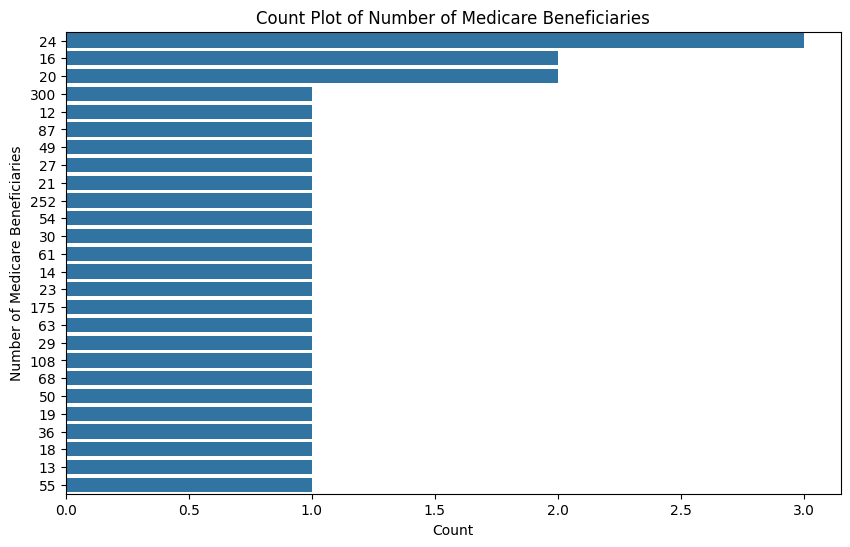

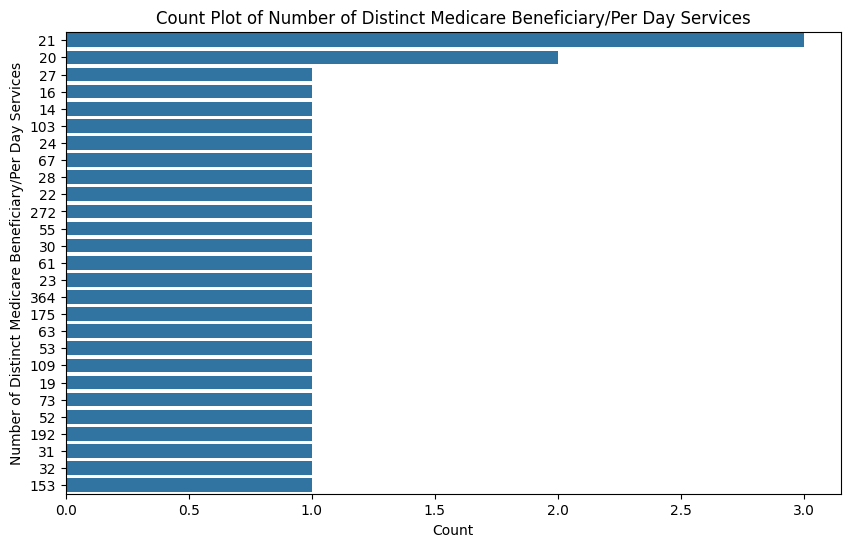

In [8]:
# Step 3: Select 10 Categorical Features
categorical_features = df_subset.select_dtypes(include=[object]).columns.tolist()[:20]

# Step 4: Plot Count Plots for Selected Categorical Features
if categorical_features:
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df_subset[feature], order=df_subset[feature].value_counts().index)
        plt.title(f'Count Plot of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.show()
else:
    print("No categorical features found in the dataset.")

Generate and visualize the correlation matrix for numerical features.
The correlation matrix shows relationships between numerical features.


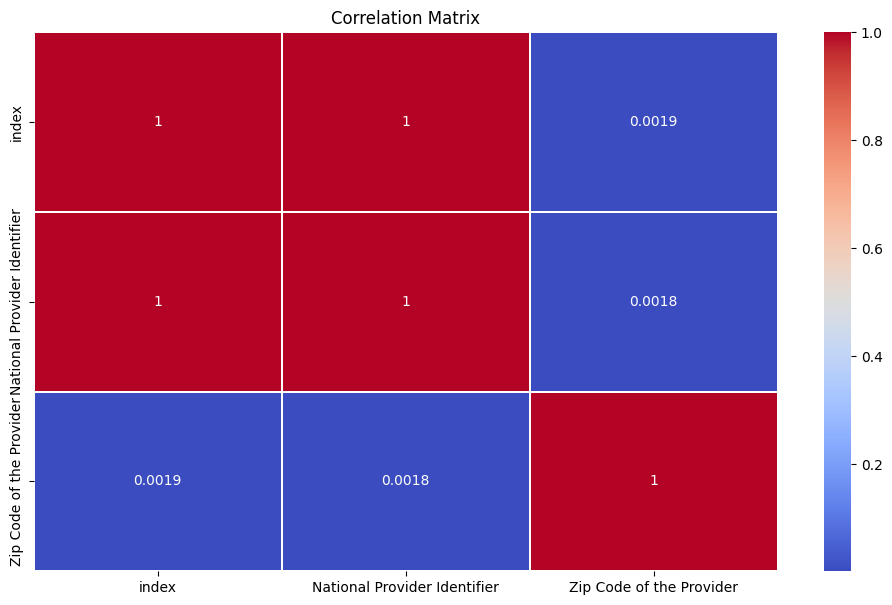

In [9]:
# Correlation matrix for numerical features
if numerical_features:
    plt.figure(figsize=(12, 7))
    correlation_matrix = df[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical features found for correlation matrix.")


Visualize relationships between numerical features using pairplots.
Pairplots help visualize pairwise relationships between numerical features.


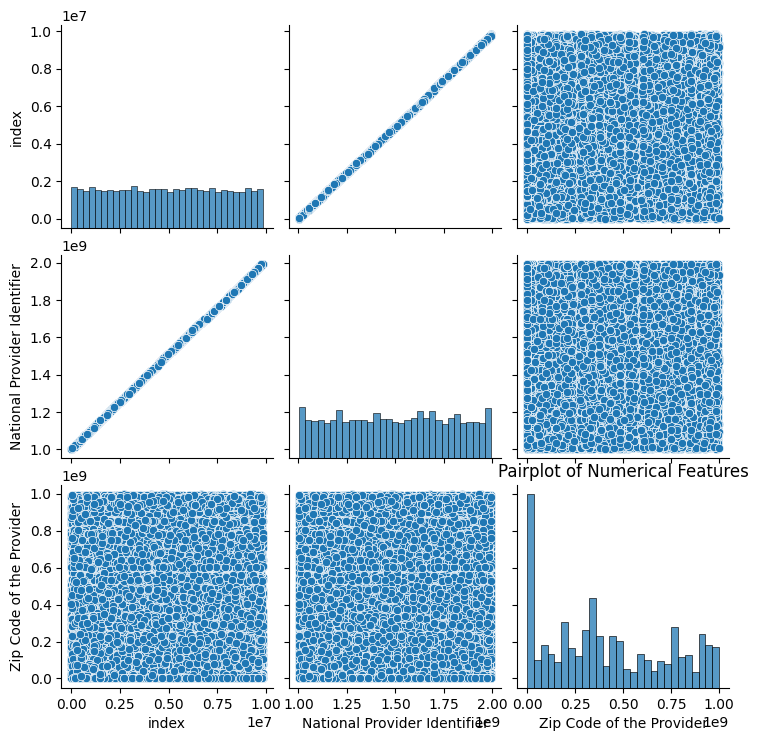

In [10]:
# Pairplot to visualize relationships between numerical features
if len(numerical_features) > 1:
    sns.pairplot(df[numerical_features])
    plt.title('Pairplot of Numerical Features')
    plt.show()
else:
    print("Not enough numerical features for pairplot.")


Create scatter plots for specific feature pairs to examine relationships.
Replace 'feature1' and 'feature2' with actual column names to examine their relationship.



In [11]:
# Scatter plot for selected features (replace 'feature1' and 'feature2' with actual column names)
if 'feature1' in df.columns and 'feature2' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='feature1', y='feature2', data=df)
    plt.title('Scatter Plot of feature1 vs feature2')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.show()
else:
    print("Scatter plot features 'feature1' and 'feature2' not found in the dataset.")


Scatter plot features 'feature1' and 'feature2' not found in the dataset.


isualize the distribution of missing values in the dataset.
The heatmap shows where missing values are located in the dataset.

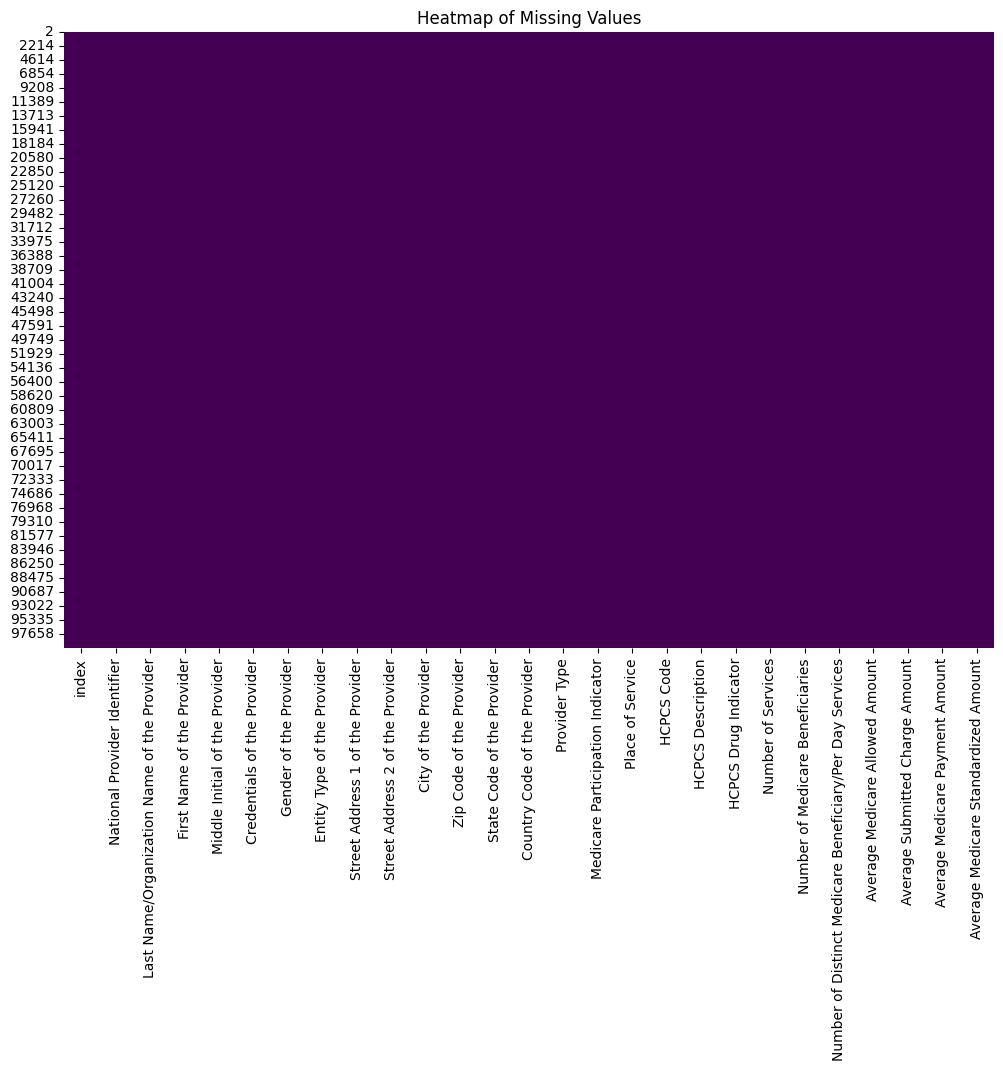

In [12]:
# Heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()
